In [1]:
import numpy as np
import matplotlib.pyplot as plt

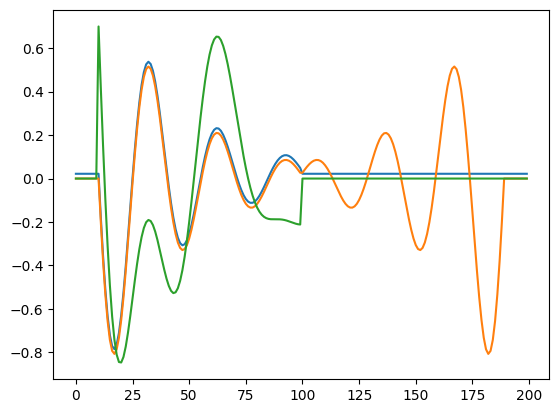

In [2]:
true_Z = {
    'Z': 0.95 + 0.2j,
    'Xi': 0+1j,
}
s = np.zeros(200, dtype=np.complex128)
s[10:100] += (true_Z['Z'] ** np.arange(90)) * true_Z['Xi']
s_centered = s.real
s_uncentered = s_centered - np.mean(s_centered)
s_mixed = s.copy()
s_mixed[100:190] += ((true_Z['Z'] ** np.arange(90)) * true_Z['Xi'])[::-1]
s_mixed = s_mixed.real
s_mixed_freq = s.copy()
true_Z_2 = {
    'Z': 0.98 + 0.1j,
    'Xi': 0.7+0.7j,
}
s_mixed_freq[10:100] += ((true_Z_2['Z'] ** np.arange(90)) * true_Z_2['Xi'])
s_mixed_freq = s_mixed_freq.real
plt.plot(s_uncentered)
plt.plot(s_mixed)
plt.plot(s_mixed_freq)

In [3]:
from pydmd import ZDecomposition, HankelDMD, DMD
from pydmd.zdecomposition import calculate_dynamics
import warnings

In [4]:
warnings.filterwarnings("ignore", category=UserWarning, module='pydmd', lineno=718)
# warnings.filterwarnings("ignore", category=RuntimeWarning, module='pydmd', lineno=272)

C:\ProgramData\miniconda3\envs\Py38\lib\site-packages\pydmd\zdecomposition.py:153: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


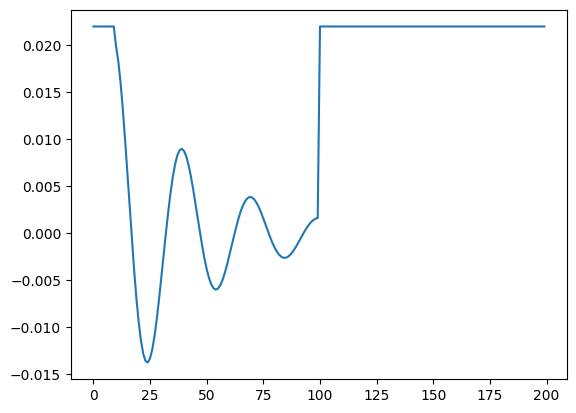

In [5]:
sub_dmd_args = {}
d = 7
window_len = 2 * d + 1
HDMD_kwargs = {
    'd': d,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)
z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Zs, residual_signal = z_dec.sift(
    s_uncentered, window_len, min_freq=0, max_freq=np.inf, min_windows=10,
    noise_var_tol=0.001
)
plt.plot(residual_signal)

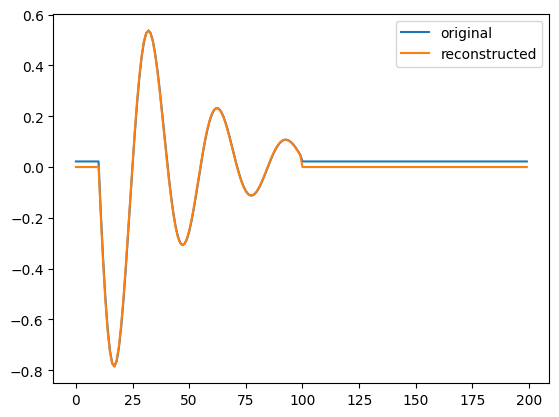

In [6]:
reconstructed = np.zeros(len(s_uncentered), dtype=np.complex128)
for Z in Zs:
    reconstructed[Z['start']:Z['end']] += calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        Z['len'],
        0
    ).real + Z['offset']
plt.plot(s_uncentered, label='original')
plt.plot(reconstructed.real, label='reconstructed')
plt.legend()

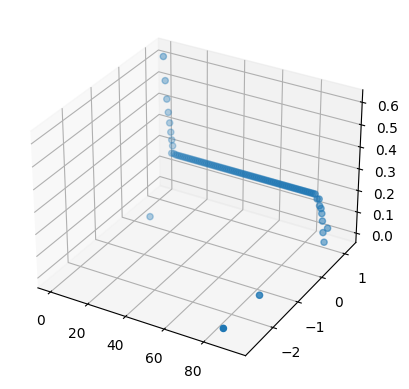

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_dec.Z_spectrogram[:,0], z_dec.Z_spectrogram[:,1], z_dec.Z_spectrogram[:,2])

In [8]:
def scatter_3d_clusters(cluster_dict):
    Z = []
    pred = []
    for cluster, cluster_Z in cluster_dict.items():
        Z.append(cluster_Z)
        pred.append(np.repeat(cluster, len(cluster_Z)))
    Z = np.concatenate(Z)
    pred = np.concatenate(pred)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=pred)

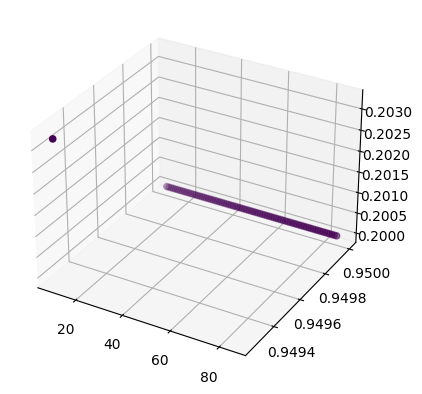

In [9]:
scatter_3d_clusters(z_dec.Z_gaussians)

In [10]:
Z = Zs[0]

In [11]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi']})
print(Z['start'], Z['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9499902360468163+0.20004168212309276j), 'Xi': (-0.01993258177195491+0.9967973479140502j)}
10 100


C:\ProgramData\miniconda3\envs\Py38\lib\site-packages\pydmd\zdecomposition.py:153: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


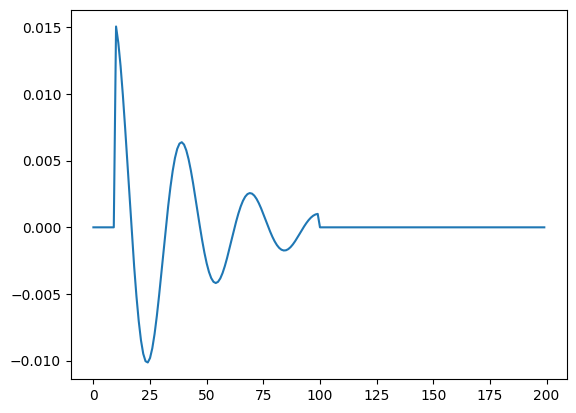

In [12]:
sub_dmd_args = {}
d = 7
window_len = 2 * d + 1
HDMD_kwargs = {
    'd': d,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)
z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Zs, residual_signal = z_dec.sift(
    s_centered, window_len, min_freq=0, max_freq=np.inf, min_windows=10,
    noise_var_tol=0.001
)
plt.plot(residual_signal)

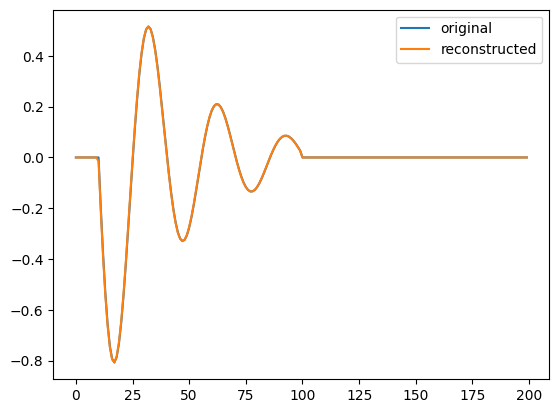

In [13]:
reconstructed = np.zeros(len(s_uncentered), dtype=np.complex128)
for Z in Zs:
    reconstructed[Z['start']:Z['end']] += calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        Z['len'],
        0
    ).real + Z['offset']
plt.plot(s_centered, label='original')
plt.plot(reconstructed.real, label='reconstructed')
plt.legend()

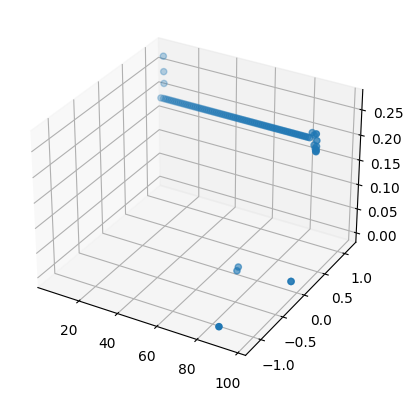

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_dec.Z_spectrogram[:,0], z_dec.Z_spectrogram[:,1], z_dec.Z_spectrogram[:,2])

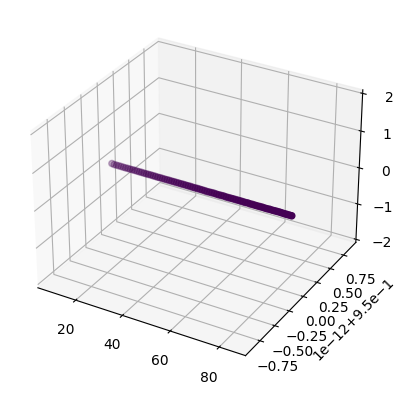

In [15]:
scatter_3d_clusters(z_dec.Z_gaussians)

In [16]:
Z = Zs[0]

In [17]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi']})
print(Z['start'], Z['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9500000000000003+0.19999999999999998j), 'Xi': (-0.015126596087781437+0.9976562934280967j)}
10 100


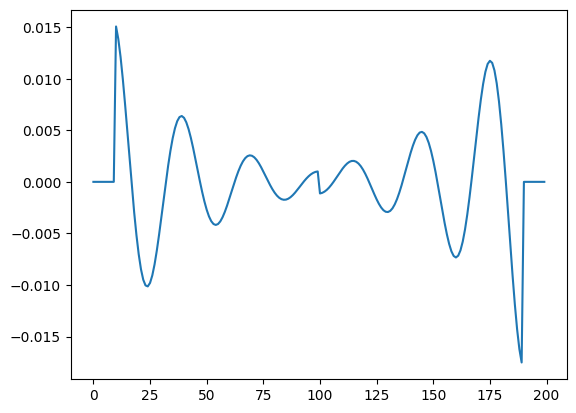

In [18]:
sub_dmd_args = {}
d = 7
window_len = 2 * d + 1
HDMD_kwargs = {
    'd': d,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)
z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Zs, residual_signal = z_dec.sift(
    s_mixed, window_len, min_freq=0, max_freq=np.inf, min_windows=10,
    noise_var_tol=0.001
)
plt.plot(residual_signal)

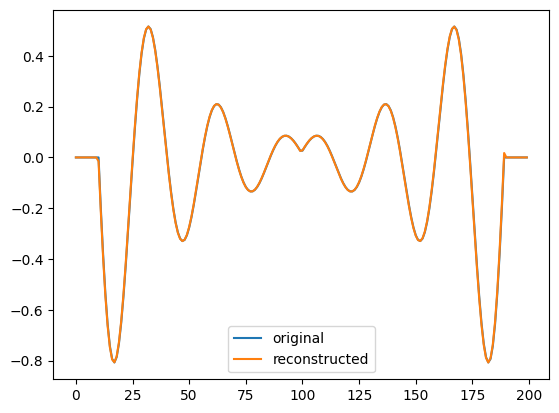

In [19]:
reconstructed = np.zeros(len(s_uncentered), dtype=np.complex128)
for Z in Zs:
    reconstructed[Z['start']:Z['end']] += calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        Z['len'],
        0
    ).real + Z['offset']
plt.plot(s_mixed, label='original')
plt.plot(reconstructed.real, label='reconstructed')
plt.legend()

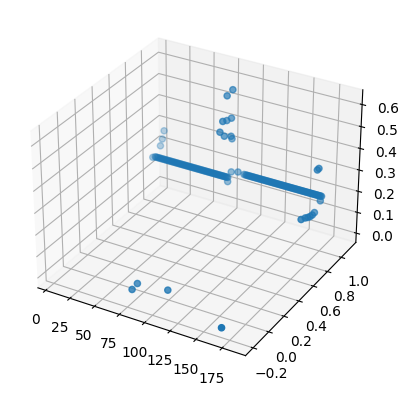

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_dec.Z_spectrogram[:,0], z_dec.Z_spectrogram[:,1], z_dec.Z_spectrogram[:,2])

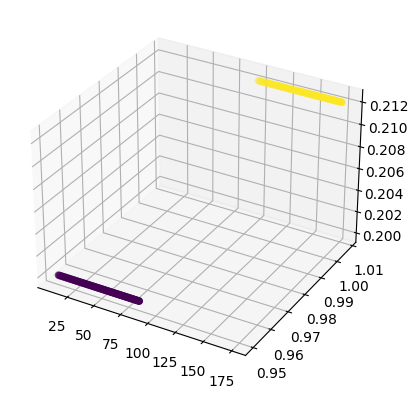

In [21]:
scatter_3d_clusters(z_dec.Z_gaussians)

In [22]:
Z_1 = Zs[0]
Z_2 = Zs[1]

In [23]:
print(true_Z)
print({'Z': Z_1['Z'], 'Xi': Z_1['Xi']})
print(Z_1['start'], Z_1['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9500000000000003+0.19999999999999998j), 'Xi': (-0.015126596087781437+0.9976562934280967j)}
10 100


In [24]:
print(Z_2['start'], Z_2['end'])
print({'Z': Z_2['Z'], 'Xi': Z_2['Xi']})

100 190
{'Z': (1.0079575596816979+0.2122015915119363j), 'Xi': (0.02798201013945453-0.06618930146674104j)}


C:\ProgramData\miniconda3\envs\Py38\lib\site-packages\pydmd\zdecomposition.py:153: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


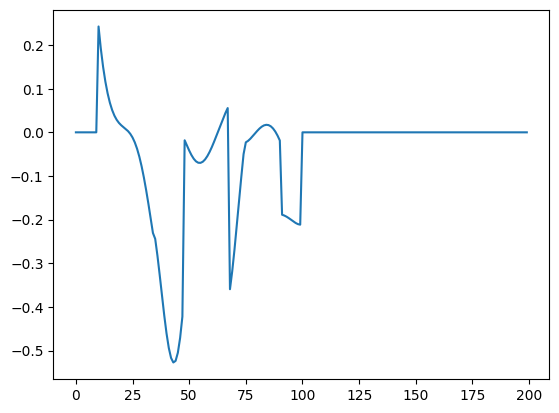

In [25]:
sub_dmd_args = {}
d = 7
window_len = 2 * d + 1
HDMD_kwargs = {
    'd': d,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)
z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Zs, residual_signal = z_dec.sift(
    s_mixed_freq, window_len, min_freq=0, max_freq=np.inf, min_windows=10,
    noise_var_tol=0.001
)
plt.plot(residual_signal)

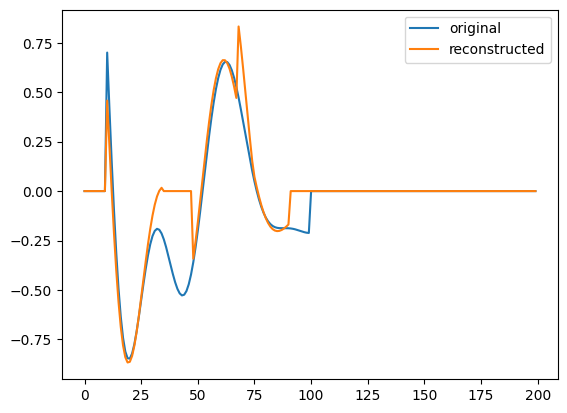

In [26]:
reconstructed = np.zeros(len(s_uncentered), dtype=np.complex128)
for Z in Zs:
    reconstructed[Z['start']:Z['end']] += calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        Z['len'],
        0
    ).real + Z['offset']
plt.plot(s_mixed_freq, label='original')
plt.plot(reconstructed.real, label='reconstructed')
plt.legend()

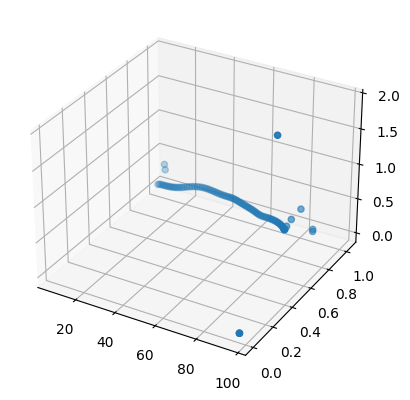

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_dec.Z_spectrogram[:,0], z_dec.Z_spectrogram[:,1], z_dec.Z_spectrogram[:,2])

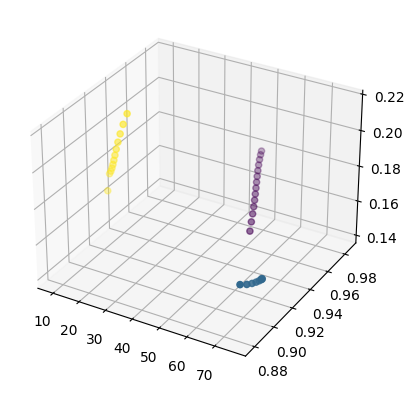

In [28]:
scatter_3d_clusters(z_dec.Z_gaussians)

In [29]:
Z_1 = Zs[0]
Z_2 = Zs[1]
Z_3 = Zs[2]
print("Z_1:", Z_1['Z'], "Xi_1:", Z_1['Xi'])
print("Z_2:", Z_2['Z'], "Xi_2:", Z_2['Xi'])
print("Z_3:", Z_3['Z'], "Xi_3:", Z_3['Xi'])
# first two Z's are extremely close to ground truth, though phasors are off

Z_1: (0.9605778390324359+0.17182024168084703j) Xi_1: (-0.5361606452545865-0.38105669943162124j)
Z_2: (0.9087278389952445+0.15217172977984936j) Xi_2: (0.5128917076620678-0.08672521182051661j)
Z_3: (0.9220063104712694+0.19130418654778114j) Xi_3: (0.690112858991958+0.9380466934683231j)
